In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime, date, timedelta
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import matplotlib.pyplot as plt


In [48]:
total = pd.read_csv("https://raw.githubusercontent.com/datzxje/ML_Project/main/data/saved/merged_data.csv", parse_dates=['Date'])
total.set_index('Date', inplace=True)

# Sort data by date to ensure correct order
total.sort_index(inplace=True)

# Shift the target variable (gold_close) by 1 day
total['next_day_gold_close'] = total['gold_close'].shift(-1)

# Remove the last row since it doesn't have a target value
total.drop(total.tail(1).index, inplace=True)

In [49]:
total.head()

,gold_open,gold_high,gold_low,gold_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX,next_day_gold_close
Date,,,,,,,,,,,,,,,,,
2010-01-04,1099.0,1124.6,1093.8,1118.3,3.4060,81.51,77.53,1.4413,31.98,2308.42,69.57,1528.45,640.10,17.463,1133.0,20.04,1118.7
2010-01-05,1122.0,1129.6,1115.5,1118.7,3.4135,81.77,77.62,1.4369,32.10,2308.71,70.14,1536.30,638.49,17.800,1136.5,19.35,1136.5
2010-01-06,1118.5,1141.0,1116.8,1136.5,3.4945,83.18,77.49,1.4413,31.23,2301.09,71.01,1563.30,637.95,18.175,1137.1,19.16,1133.7
2010-01-07,1139.0,1139.5,1128.7,1133.7,3.4270,82.66,77.91,1.4318,33.38,2300.05,70.62,1555.10,641.97,18.345,1141.7,19.06,1138.9
2010-01-08,1131.5,1140.0,1119.5,1138.9,3.4005,82.75,77.47,1.4413,34.50,2317.17,71.19,1581.20,644.56,18.470,1145.0,18.13,1151.4


# Chia Dataset thành 3 tập (Training, Validation và Testing)

In [50]:
from sklearn.model_selection import train_test_split
# Select features and target
features = ["gold_open", "gold_high", "gold_low", 'copper', 'crude_oil', 'DXY', 'EURUSD', 'MSCI', 'NASDAQ', 'NLR', 'platinum', 'RUT', 'silver', 'SP500', 'VIX']
target = 'next_day_gold_close'

X = total[features]
y = total[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [51]:
# Print shapes of the datasets

print("Train Features Shape:", X_train.shape)
print("Train Labels Shape:", y_train.shape)

print("Testing Features Shape:", X_test.shape)
print("Testing Labels Shape:", y_test.shape)

Train Features Shape: (2975, 15)
Train Labels Shape: (2975,)
Testing Features Shape: (744, 15)
Testing Labels Shape: (744,)


In [52]:
X_train

,gold_open,gold_high,gold_low,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
Date,,,,,,,,,,,,,,,
2010-01-04,1099.0,1124.6,1093.8,3.4060,81.51,77.53,1.4413,31.98,2308.42,69.57,1528.45,640.10,17.463,1133.0,20.04
2010-01-05,1122.0,1129.6,1115.5,3.4135,81.77,77.62,1.4369,32.10,2308.71,70.14,1536.30,638.49,17.800,1136.5,19.35
2010-01-06,1118.5,1141.0,1116.8,3.4945,83.18,77.49,1.4413,31.23,2301.09,71.01,1563.30,637.95,18.175,1137.1,19.16
2010-01-07,1139.0,1139.5,1128.7,3.4270,82.66,77.91,1.4318,33.38,2300.05,70.62,1555.10,641.97,18.345,1141.7,19.06
2010-01-08,1131.5,1140.0,1119.5,3.4005,82.75,77.47,1.4413,34.50,2317.17,71.19,1581.20,644.56,18.470,1145.0,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-07,1797.0,1810.2,1794.1,4.3225,72.20,92.64,1.1789,555.77,14665.06,52.75,1081.90,2252.85,26.129,4358.1,16.20
2021-07-08,1803.8,1819.5,1793.5,4.2645,72.94,92.42,1.1842,553.54,14559.78,52.18,1074.50,2231.68,25.987,4320.8,19.00
2021-07-09,1803.2,1813.0,1796.6,4.3455,74.56,92.13,1.1873,560.23,14701.92,52.77,1095.70,2280.01,26.234,4369.6,16.18


In [53]:
X_test

,gold_open,gold_high,gold_low,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
Date,,,,,,,,,,,,,,,
2021-07-14,1808.3,1831.1,1804.9,4.2675,73.13,92.41,1.1835,555.19,14644.95,52.46,1128.1,2202.36,26.271,4374.30,16.33
2021-07-15,1828.7,1835.0,1820.6,4.3230,71.65,92.62,1.1812,559.85,14543.13,52.60,1137.7,2190.29,26.394,4360.00,17.01
2021-07-16,1830.7,1832.7,1809.5,4.3230,71.81,92.69,1.1805,564.83,14427.24,52.58,1108.5,2163.24,25.795,4327.20,18.45
2021-07-19,1811.6,1818.0,1795.0,4.2015,66.42,92.89,1.1798,556.84,14274.98,51.37,1071.4,2130.68,25.144,4258.50,22.50
2021-07-20,1813.5,1825.9,1805.2,4.2630,67.42,92.97,1.1779,563.57,14498.88,51.95,1065.2,2194.30,24.995,4323.10,19.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-10,2353.5,2385.3,2352.0,4.6625,78.26,105.30,1.0769,484.89,16340.87,83.54,1007.2,2059.78,28.506,5222.68,12.55
2024-05-13,2369.1,2370.8,2337.6,4.7660,79.12,105.22,1.0788,485.51,16388.24,83.28,1010.8,2062.12,28.443,5221.42,13.60
2024-05-14,2342.3,2365.2,2340.5,4.8950,78.02,105.01,1.0818,488.11,16511.18,84.06,1044.6,2085.69,28.702,5246.68,13.42


# Modeling

In [54]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


## Ramdom Search with Cross Validation

In [56]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 14, num = 7)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, None],
 'max_features': ['log2', 'sqrt', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [57]:
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 timeseriessplit
tscv = TimeSeriesSplit(n_splits=3)

# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = tscv, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

In [58]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 12,
 'bootstrap': True}

### Top 10 best_params

In [59]:
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier


# Utility function to report best scores
def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [60]:
print((len(rf_random.cv_results_["params"])))
report(rf_random.cv_results_)

100
Model with rank: 1
Mean validation score: -19.925 (std: 10.986)
Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 12, 'bootstrap': True}

Model with rank: 2
Mean validation score: -20.036 (std: 11.366)
Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'bootstrap': True}

Model with rank: 3
Mean validation score: -20.372 (std: 11.367)
Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 12, 'bootstrap': True}

Model with rank: 4
Mean validation score: -20.468 (std: 11.426)
Parameters: {'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 12, 'bootstrap': True}

Model with rank: 5
Mean validation score: -20.792 (std: 10.637)
Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth':

## Evaluation Function

In [61]:
import joblib


In [62]:
y_test = np.array(y_test)

def ACC(model, X_test, y_test, X_train_valid, y_train_valid):    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train_valid)
    
    print('Model Performance')
    print(30*'*')
    print("Test accuracy for train set")
    #RMSE
    print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_train_valid, y_train_pred)))

    #MAPE
    print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_train_valid,y_train_pred))
    print()
    

    print("Test accuracy for test set")
    #RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Root Mean Square Error (RMSE):", rmse)

    #MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(" Mean Absolute Percentage Error (MAPE):", mape)
    print()
    
    #R2
    print("R2 score:", r2_score(y_test,y_pred))
    print()
    
    sns.displot(y_test - y_pred, kde=True)
    plt.xlabel('y_test - y_pred')
    plt.ylabel('count')
    plt.show()
    
    print()
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('y_test')
    plt.ylabel('Predicted')
    plt.show()
    
    print()
    fig, ax = plt.subplots(1, 1, figsize=(14, 5))
    ax.plot(X_test.index, y_test, color = 'red', label="GOLD Price")
    ax.plot(X_test.index, y_pred, color = 'green', label="Predicted GOLD Price", linestyle="dashed")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # .3f
    plt.title("Random Forest Regression")
    plt.legend()
    plt.show()
    
    print()
    


## Evaluate the Default Model

## Grid Search

In [63]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [4, 8, 10, 12, None],
    'max_features': [None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300, 400, 500, 800, 900]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)
tscv = TimeSeriesSplit(n_splits=3)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = tscv, n_jobs = -1, return_train_score=True)

In [64]:
grid_search.fit(X_train, y_train);

In [65]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

# Evaluate

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 6.216125101755294
Mean Absolute Percentage Error (MAPE): 0.0029798260863125813

Test accuracy for test set
Root Mean Square Error (RMSE): 87.2081192214649
 Mean Absolute Percentage Error (MAPE): 0.02100422133199278

R2 score: 0.6680805377710635



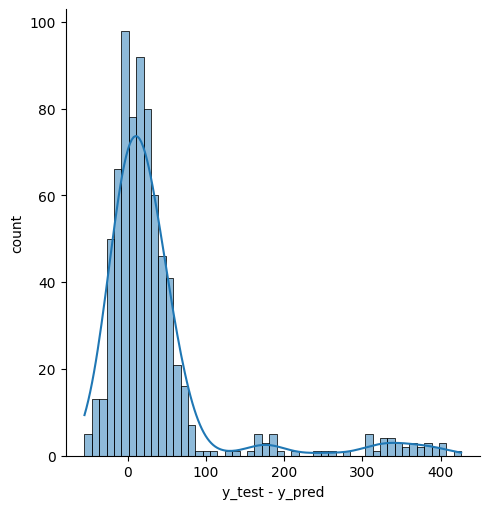

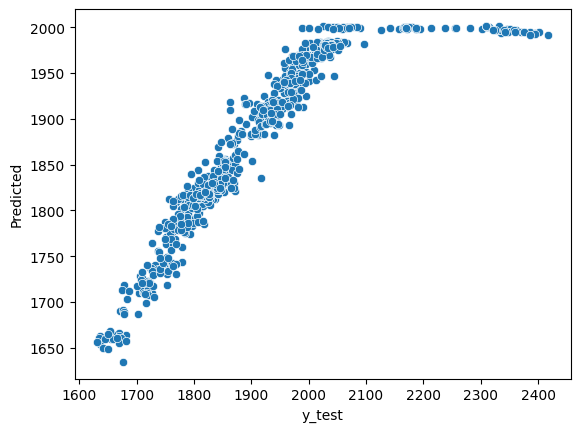

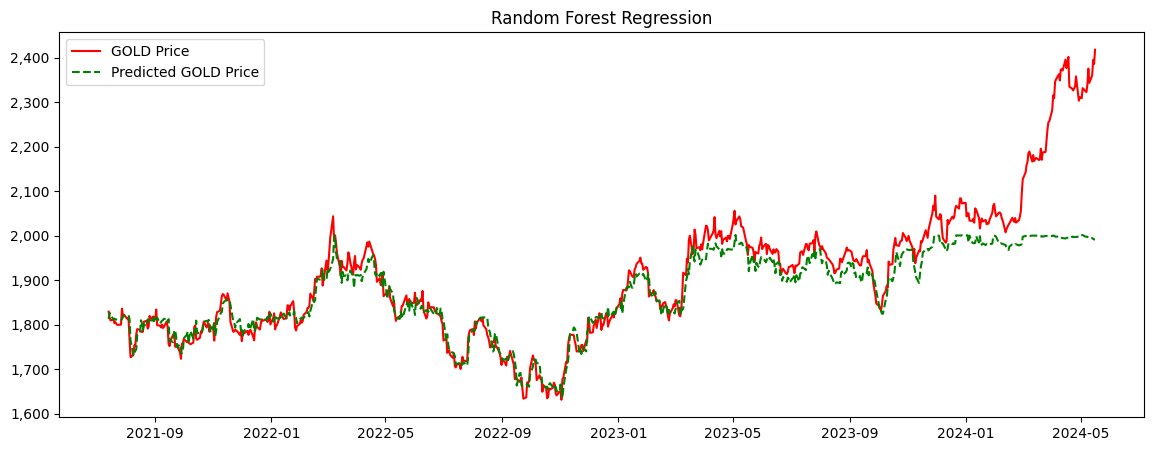

['base_model.pkl']

In [66]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train_valid, y_train_valid)
base_accuracy = ACC(base_model, X_test, y_test, X_train_valid, y_train_valid)
joblib.dump(base_model, "base_model.pkl")

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 11.818620004545199
Mean Absolute Percentage Error (MAPE): 0.005823793036236526

Test accuracy for test set
Root Mean Square Error (RMSE): 89.82231647388406
 Mean Absolute Percentage Error (MAPE): 0.020672620235573473

R2 score: 0.6478826865162781



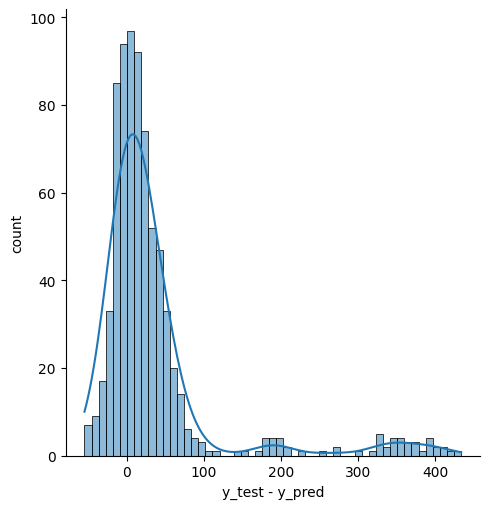

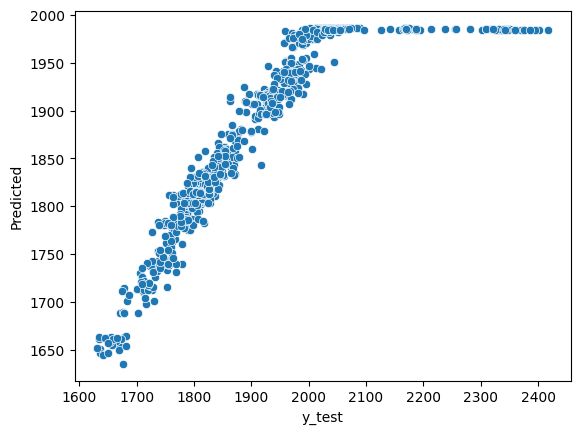

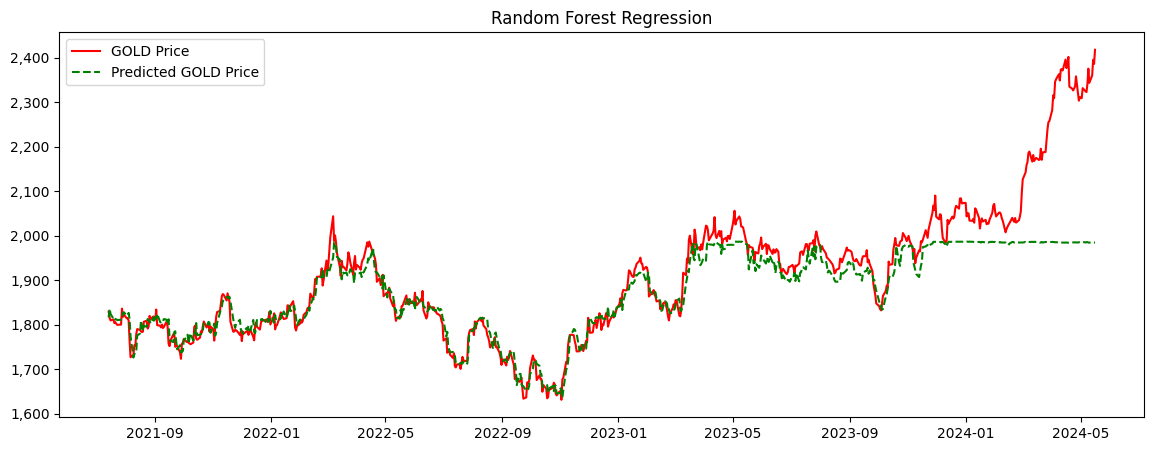

['best_grid.pkl']

In [67]:
best_grid = grid_search.best_estimator_
best_grid.fit(X_train_valid, y_train_valid)
grid_accuracy = ACC(best_grid, X_test, y_test, X_train_valid, y_train_valid)
joblib.dump(best_grid, "best_grid.pkl")

In [ ]:
best_random = RandomForestRegressor(**rf_random.best_params_)
best_random.fit(X_train_valid, y_train_valid)
random_accuracy = ACC(best_random, X_test, y_test, X_train_valid, y_train_valid)
joblib.dump(best_random, "best_random.pkl")


In [ ]:
# To predict tomorrow's gold price, use today's data
latest_data = total.tail(1)[features]
tomorrow_gold_price = best_grid.predict(latest_data)
print(f"Predicted gold price for tomorrow: {tomorrow_gold_price[0]:.4f}")